In [1]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
#Setting Whitegrid as white
%matplotlib inline
sns.set_style('whitegrid')
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading xlsx FILE
df = pd.read_excel('/content/drive/My Drive/Project_Seminar/TrainCASocial.xlsx')

In [5]:
#CHECKING DATA IN TABULATED FORM
df.head()

,Unnamed: 0,Unnamed: 0.1,Keywords,Years,Months,impact_blog,impact_forum,impact_news,impact_review,impact_twitter,twitter retweets,instagram likes,sentiment_negative,sentiment_neutral,sentiment_positive,full text,hashtags,media urls,country,trend,category
0,0,0,Mojito ice cream,2015,5,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2,['Adult snack -- vegan mojito ice cream! #food...,"['#foodie', nan]","[""[u'http://4sq.com/1G9xDr0']"", '[]']",CA,nontrend,smallc
1,1,1,Mojito ice cream,2015,8,0.0,0.0,0.0,0.0,33.0,1,0,0,0,4,['Who wants Mojito ice cream? ...everyone does...,"['#bangbang, #summerofrum', nan, nan, nan]","[""[u'http://pbs.twimg.com/media/CL2TA8ZWEAQnzr...",CA,nontrend,smallc
2,2,2,Mojito ice cream,2015,10,0.0,0.0,0.0,0.0,73.6,2,0,0,3,0,['RT @FrostyFox_IC First week Frosty Fox had w...,"[nan, nan, nan]","['[]', '[]', '[]']",CA,nontrend,smallc
3,3,3,Mojito ice cream,2016,8,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,['Coconut Ash + Mojito ice cream @ CA LEM http...,[nan],"[""[u'https://www.instagram.com/p/BJl4rAchF0H/']""]",CA,nontrend,smallc
4,4,4,Mojito ice cream,2016,9,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,"[""Come by + celebrate the long weekend with so...",[nan],"[""[u'http://pbs.twimg.com/media/CreN0iYVUAAgUe...",CA,nontrend,smallc


In [6]:
#No Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10350 entries, 0 to 10349
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10350 non-null  int64  
 1   Unnamed: 0.1        10350 non-null  int64  
 2   Keywords            10350 non-null  object 
 3   Years               10350 non-null  int64  
 4   Months              10350 non-null  int64  
 5   impact_blog         10350 non-null  float64
 6   impact_forum        10350 non-null  float64
 7   impact_news         10350 non-null  float64
 8   impact_review       10350 non-null  float64
 9   impact_twitter      10350 non-null  float64
 10  twitter retweets    10350 non-null  int64  
 11  instagram likes     10350 non-null  int64  
 12  sentiment_negative  10350 non-null  int64  
 13  sentiment_neutral   10350 non-null  int64  
 14  sentiment_positive  10350 non-null  int64  
 15  full text           10350 non-null  object 
 16  hash

In [7]:
##We want to see the columns which has atleast 7000 and above observations 
GMM = df.dropna(axis='columns', thresh = 7000)

In [8]:
GMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10350 entries, 0 to 10349
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10350 non-null  int64  
 1   Unnamed: 0.1        10350 non-null  int64  
 2   Keywords            10350 non-null  object 
 3   Years               10350 non-null  int64  
 4   Months              10350 non-null  int64  
 5   impact_blog         10350 non-null  float64
 6   impact_forum        10350 non-null  float64
 7   impact_news         10350 non-null  float64
 8   impact_review       10350 non-null  float64
 9   impact_twitter      10350 non-null  float64
 10  twitter retweets    10350 non-null  int64  
 11  instagram likes     10350 non-null  int64  
 12  sentiment_negative  10350 non-null  int64  
 13  sentiment_neutral   10350 non-null  int64  
 14  sentiment_positive  10350 non-null  int64  
 15  full text           10350 non-null  object 
 16  hash

In [9]:
# Drop the 'Unnamed: 0', 'Unnamed: 0.1', 'full text', 'hashtags' and 'media urls' columns
GMM.drop(['Unnamed: 0', 'Unnamed: 0.1', 'full text', 'hashtags', 'media urls'], axis='columns', inplace=True)
GMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10350 entries, 0 to 10349
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            10350 non-null  object 
 1   Years               10350 non-null  int64  
 2   Months              10350 non-null  int64  
 3   impact_blog         10350 non-null  float64
 4   impact_forum        10350 non-null  float64
 5   impact_news         10350 non-null  float64
 6   impact_review       10350 non-null  float64
 7   impact_twitter      10350 non-null  float64
 8   twitter retweets    10350 non-null  int64  
 9   instagram likes     10350 non-null  int64  
 10  sentiment_negative  10350 non-null  int64  
 11  sentiment_neutral   10350 non-null  int64  
 12  sentiment_positive  10350 non-null  int64  
 13  country             10350 non-null  object 
 14  trend               10350 non-null  object 
 15  category            10350 non-null  object 
dtypes: f

In [10]:
# converting to binary data with column trend
GMM1 = pd.get_dummies(GMM, columns=['trend'])
GMM1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10350 entries, 0 to 10349
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            10350 non-null  object 
 1   Years               10350 non-null  int64  
 2   Months              10350 non-null  int64  
 3   impact_blog         10350 non-null  float64
 4   impact_forum        10350 non-null  float64
 5   impact_news         10350 non-null  float64
 6   impact_review       10350 non-null  float64
 7   impact_twitter      10350 non-null  float64
 8   twitter retweets    10350 non-null  int64  
 9   instagram likes     10350 non-null  int64  
 10  sentiment_negative  10350 non-null  int64  
 11  sentiment_neutral   10350 non-null  int64  
 12  sentiment_positive  10350 non-null  int64  
 13  country             10350 non-null  object 
 14  category            10350 non-null  object 
 15  trend_nontrend      10350 non-null  uint8  
 16  tren

In [11]:
GMM2 = GMM1.rename(columns = {'trend_trend': 'trend', 'trend_nontrend': 'nontrend'}, inplace = False)
GMM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10350 entries, 0 to 10349
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            10350 non-null  object 
 1   Years               10350 non-null  int64  
 2   Months              10350 non-null  int64  
 3   impact_blog         10350 non-null  float64
 4   impact_forum        10350 non-null  float64
 5   impact_news         10350 non-null  float64
 6   impact_review       10350 non-null  float64
 7   impact_twitter      10350 non-null  float64
 8   twitter retweets    10350 non-null  int64  
 9   instagram likes     10350 non-null  int64  
 10  sentiment_negative  10350 non-null  int64  
 11  sentiment_neutral   10350 non-null  int64  
 12  sentiment_positive  10350 non-null  int64  
 13  country             10350 non-null  object 
 14  category            10350 non-null  object 
 15  nontrend            10350 non-null  uint8  
 16  tren

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


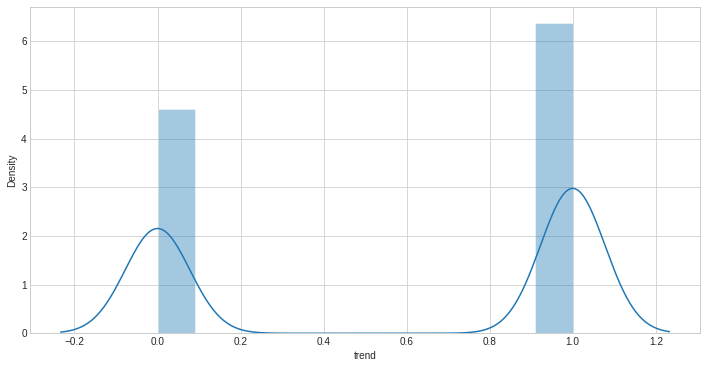

In [12]:
#Checking Distribution for all the dependent variable 
sns.distplot(GMM2['trend'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


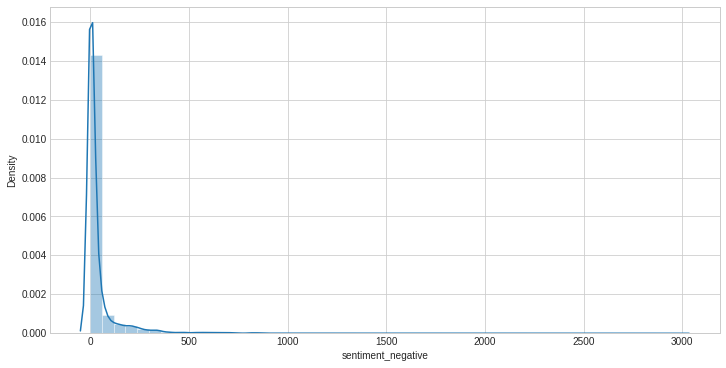

In [13]:
#Checking Distribution for some other variable 
sns.distplot(GMM2['sentiment_negative'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


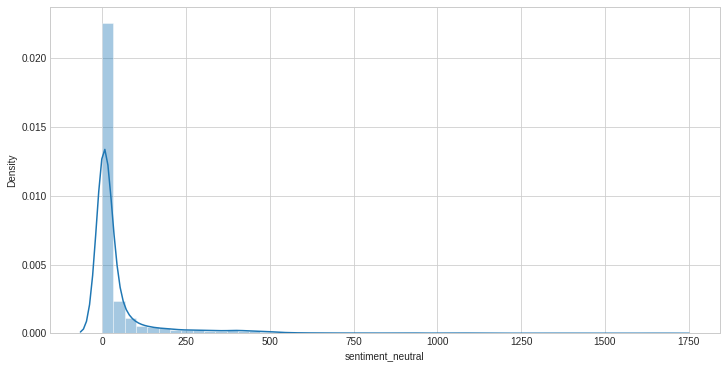

In [14]:
#Checking Distribution for some other variable
sns.distplot(GMM2['sentiment_neutral'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


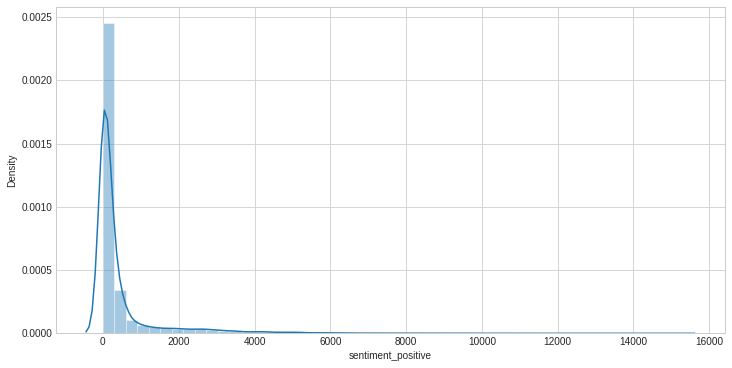

In [15]:
#Checking Distribution for some other variable 
sns.distplot(GMM2['sentiment_positive'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


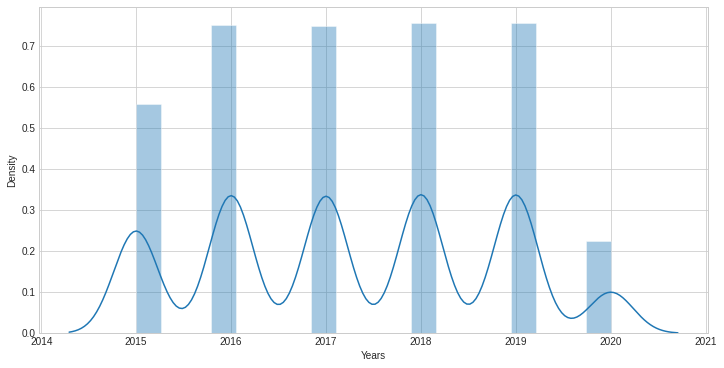

In [16]:
#Checking Distribution for some other variable
sns.distplot(GMM2['Years'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


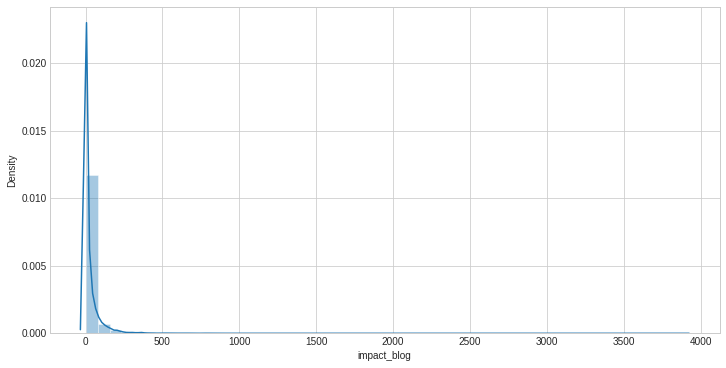

In [17]:
#Checking Distribution for some other variable 
sns.distplot(GMM2['impact_blog'])

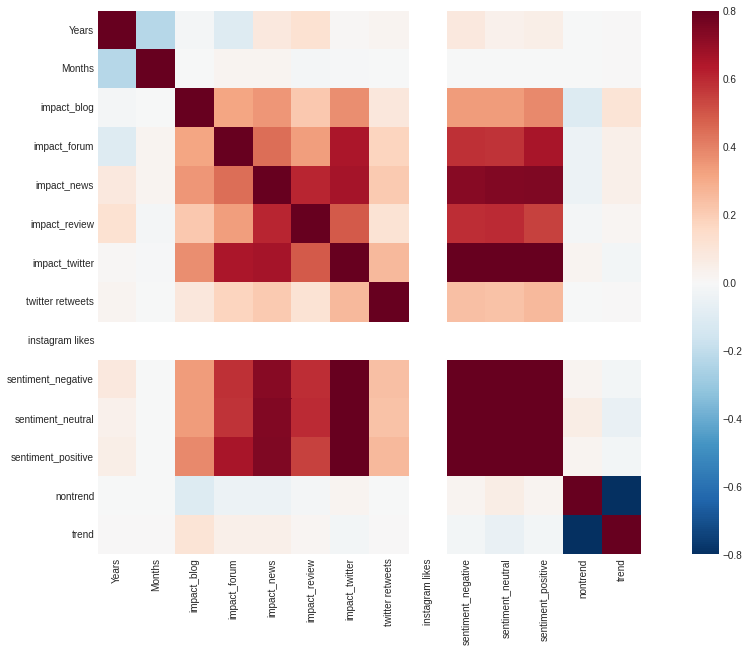

In [18]:
#correlation matrix for variables
corrmat = GMM2.corr()
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrmat,vmin=-.8, vmax=.8, square=True, cmap='RdBu_r')

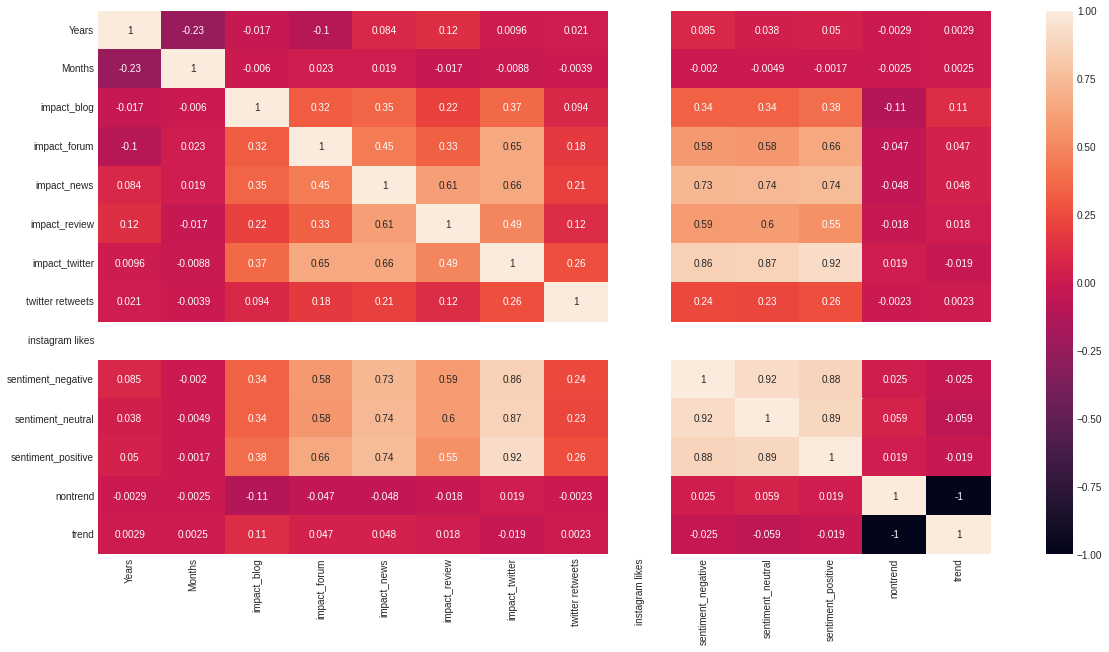

In [19]:
# Let's check the correlation between the variables 
plt.figure(figsize=(20,10)) 
sns.heatmap(GMM2.corr(), annot=True) 

In [20]:
#Creating List of Variable
my_list = list(GMM2)
print (my_list)

['Keywords', 'Years', 'Months', 'impact_blog', 'impact_forum', 'impact_news', 'impact_review', 'impact_twitter', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive', 'country', 'category', 'nontrend', 'trend']


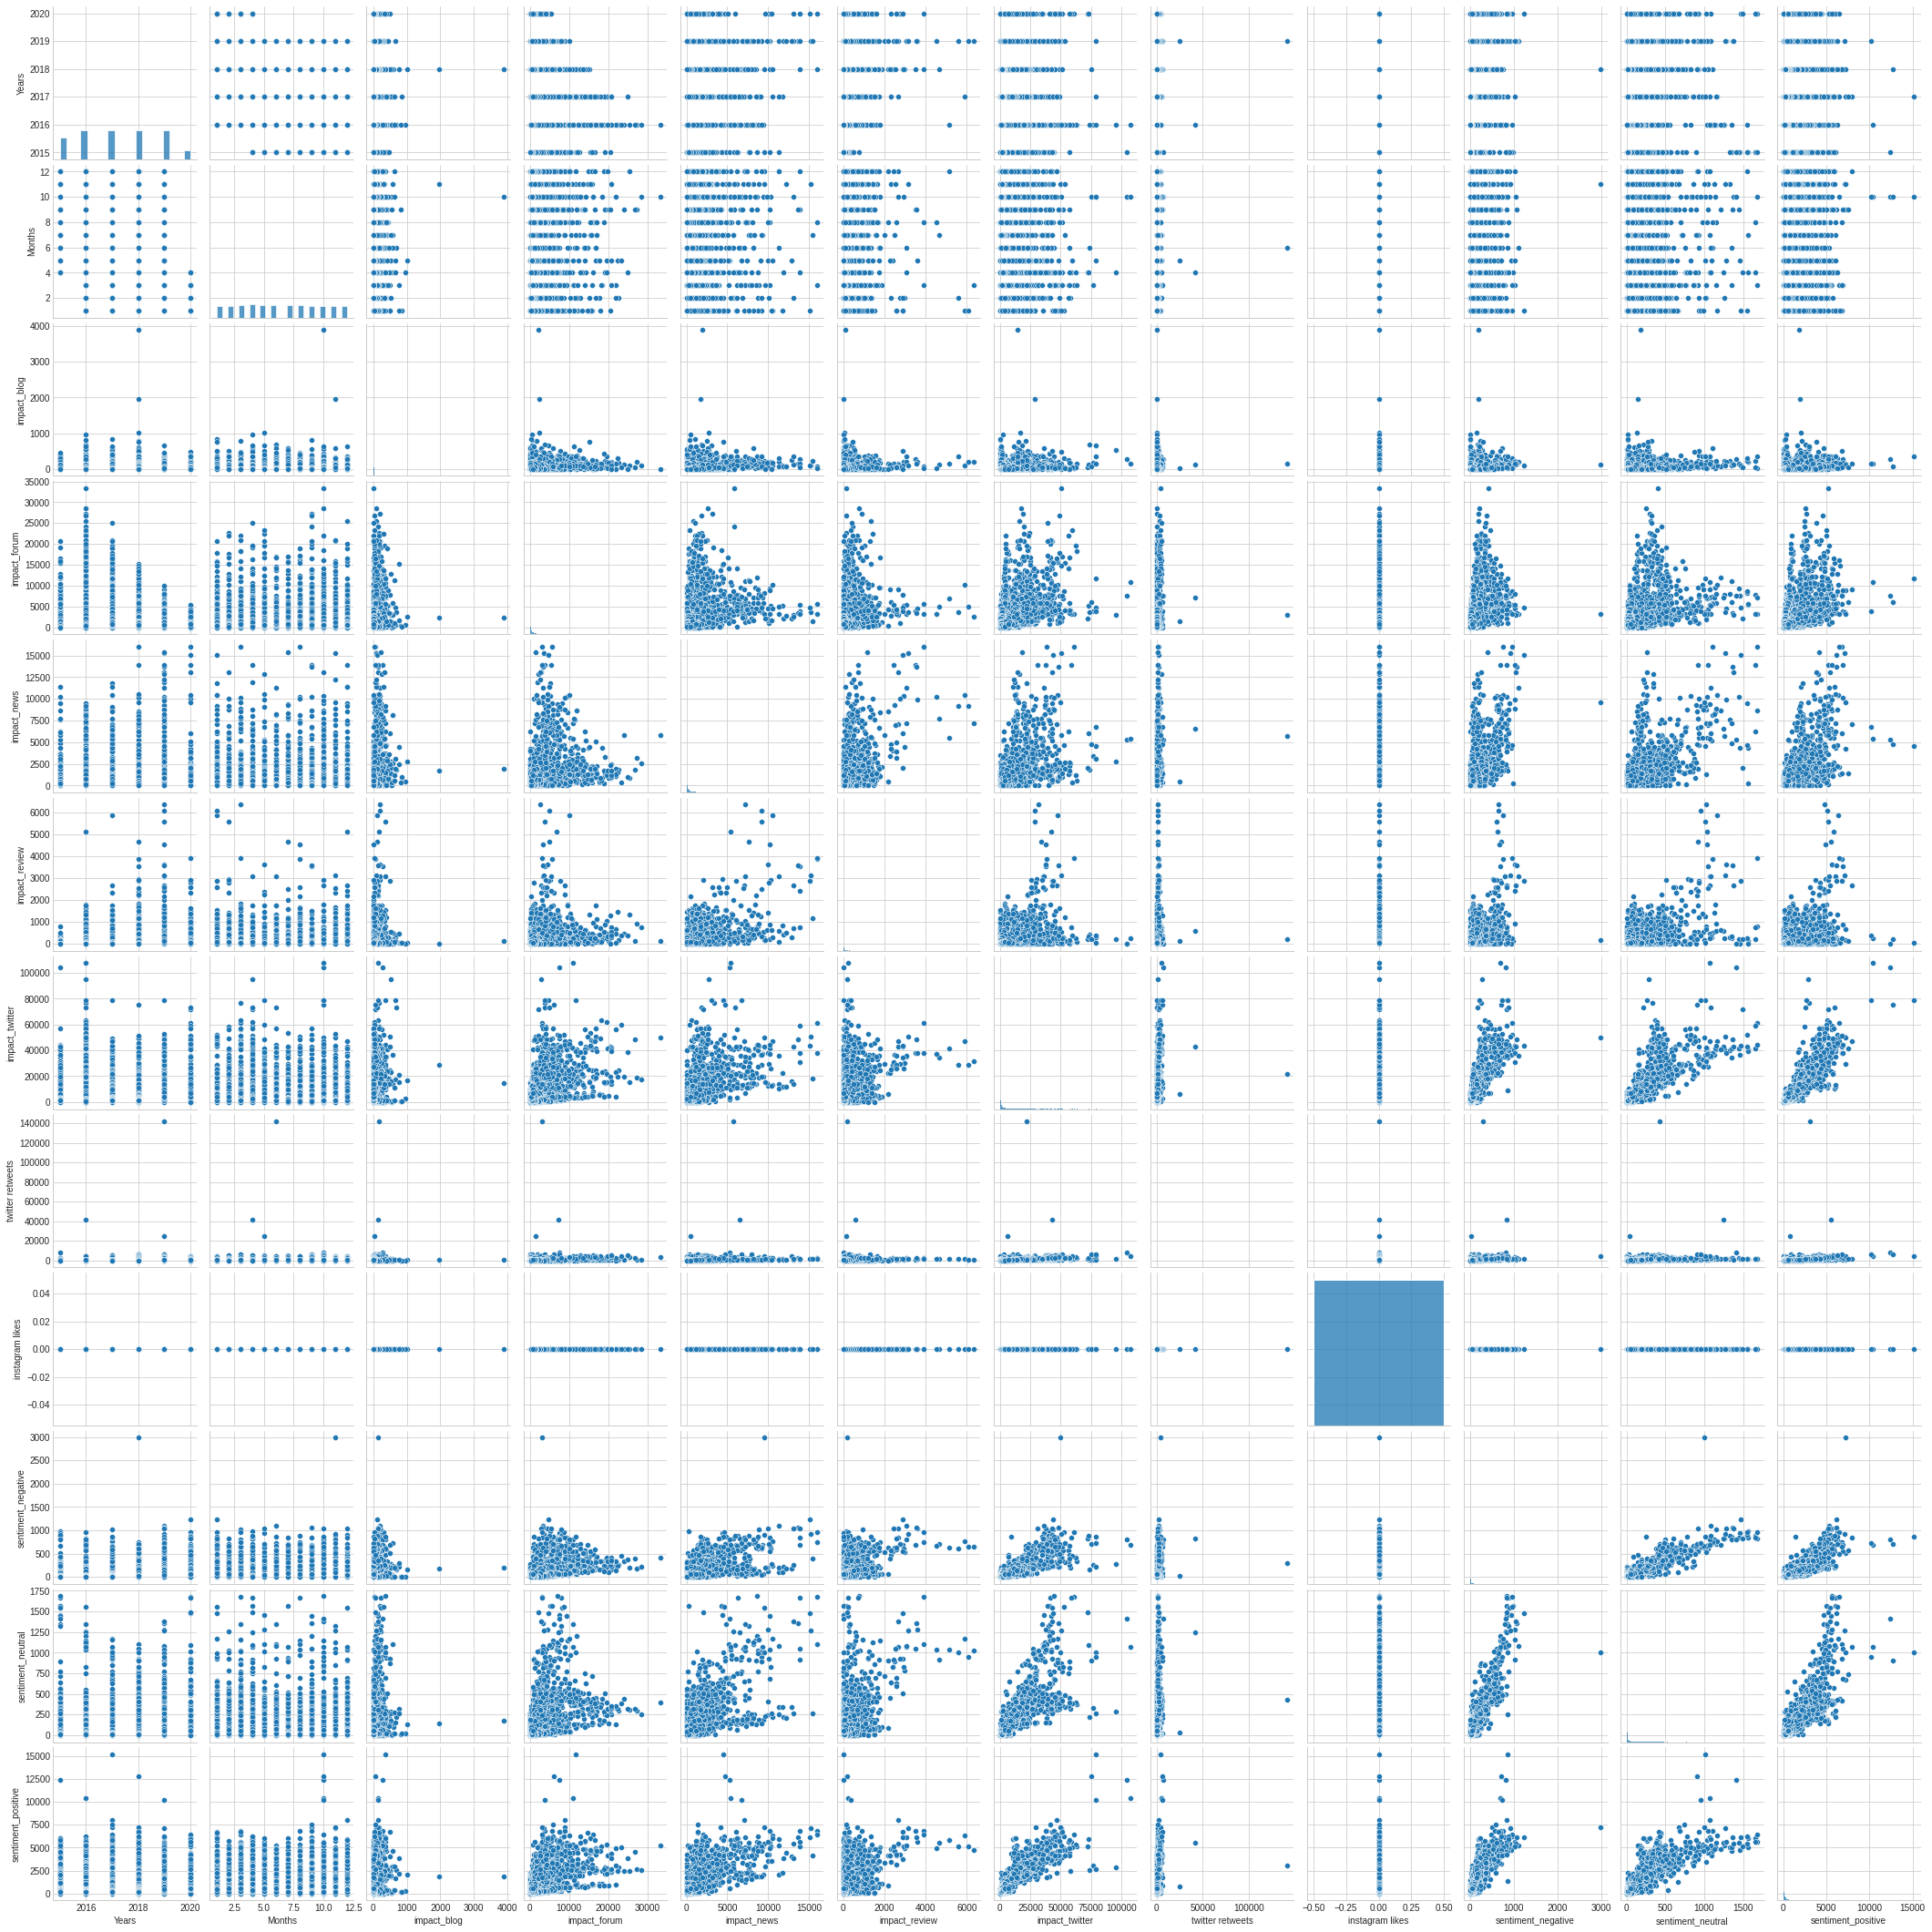

In [21]:
#scatter plots
cols = ['Years', 'Months', 'impact_blog', 'impact_forum','impact_news', 'impact_review', 'impact_twitter', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive']
sns.pairplot(GMM2[cols], height = 2.5)
plt.show()

In [22]:
#check features correlated with trend
corrmat['trend'].sort_values(ascending=False)


trend                 1.000000
impact_blog           0.109760
impact_news           0.047994
impact_forum          0.047221
impact_review         0.018206
Years                 0.002875
Months                0.002491
twitter retweets      0.002276
sentiment_positive   -0.019280
impact_twitter       -0.019444
sentiment_negative   -0.024591
sentiment_neutral    -0.059414
nontrend             -1.000000
instagram likes            NaN
Name: trend, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


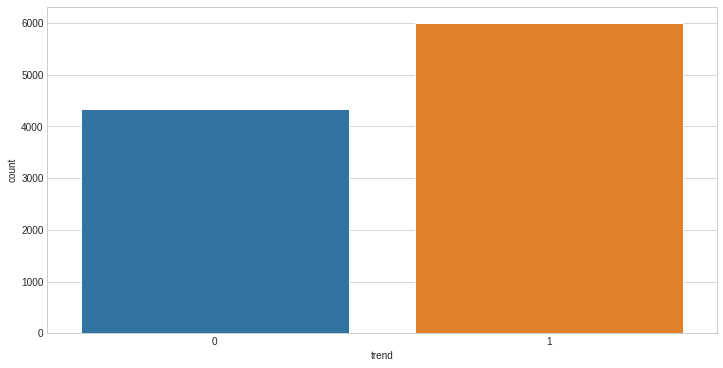

In [23]:
#Counting Trend and Non Trend Number
sns.countplot(GMM2['trend'], label = "Count")

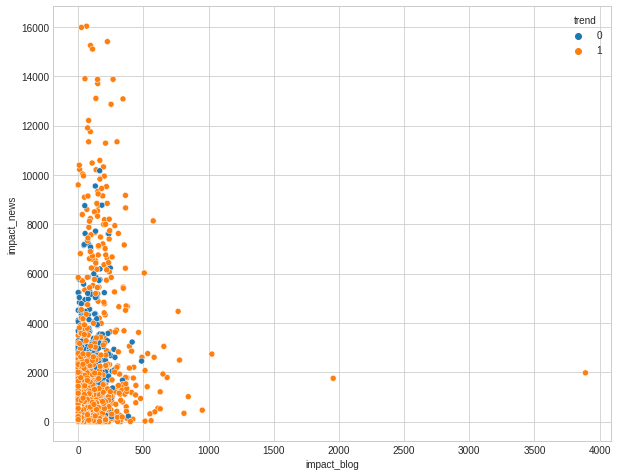

In [24]:
#Checking trend with impact_blog and impact_news
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'impact_blog', y = 'impact_news', hue = 'trend', data = GMM2)

In [25]:
['impact_review', 'impact_twitter', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive', 'country', 'category', 'nontrend', 'trend']


['impact_review',
 'impact_twitter',
 'twitter retweets',
 'instagram likes',
 'sentiment_negative',
 'sentiment_neutral',
 'sentiment_positive',
 'country',
 'category',
 'nontrend',
 'trend']

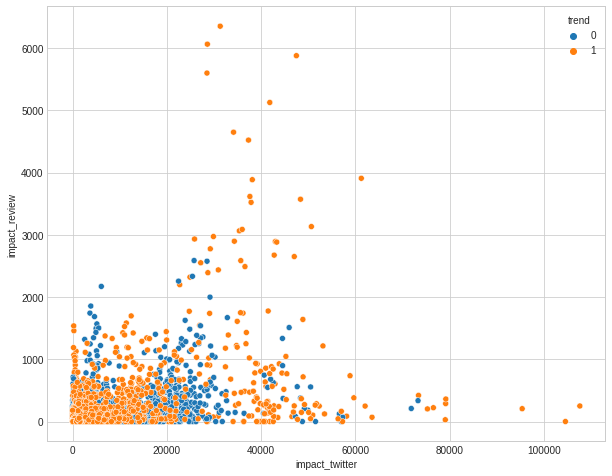

In [26]:
#Checking trend with impact_blog and impact_news
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'impact_twitter', y = 'impact_review', hue = 'trend', data = GMM2)

In [27]:
#EVERYTHING IS GOOD HERE##

In [28]:
#taking all variables for test
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

'X' shape: (10350, 12)
'y' shape: (10350,)


In [29]:
X_train = X
y_train = y

In [30]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)

In [31]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [32]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 210, 1290],
       [ 106, 2017]])

Text(0.5, 384.16, 'Predicted label')

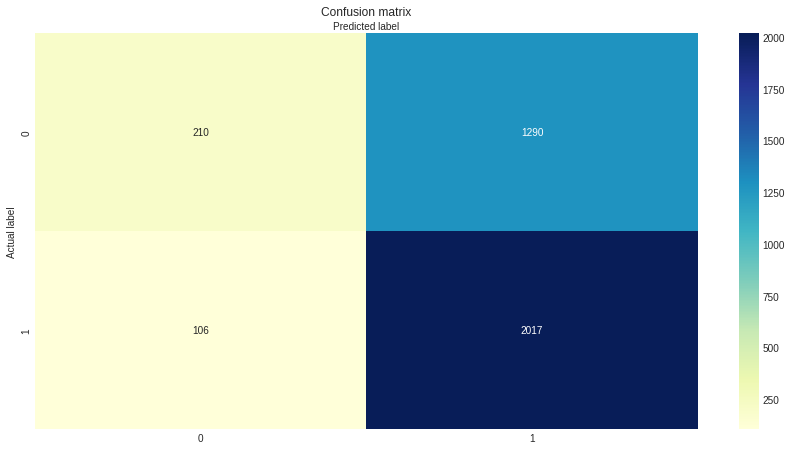

In [33]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6146839635661054
Precision: 0.6099183550045358
Recall: 0.9500706547338672


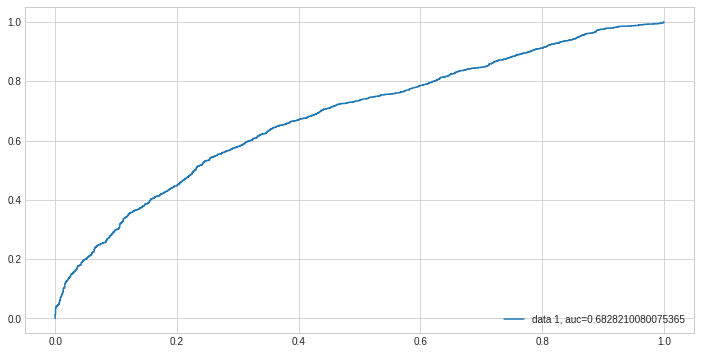

In [35]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [36]:
# Importing libraries for scaling
from sklearn.preprocessing import StandardScaler

In [37]:
GMM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10350 entries, 0 to 10349
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            10350 non-null  object 
 1   Years               10350 non-null  int64  
 2   Months              10350 non-null  int64  
 3   impact_blog         10350 non-null  float64
 4   impact_forum        10350 non-null  float64
 5   impact_news         10350 non-null  float64
 6   impact_review       10350 non-null  float64
 7   impact_twitter      10350 non-null  float64
 8   twitter retweets    10350 non-null  int64  
 9   instagram likes     10350 non-null  int64  
 10  sentiment_negative  10350 non-null  int64  
 11  sentiment_neutral   10350 non-null  int64  
 12  sentiment_positive  10350 non-null  int64  
 13  country             10350 non-null  object 
 14  category            10350 non-null  object 
 15  nontrend            10350 non-null  uint8  
 16  tren

In [38]:
X

,Years,Months,impact_blog,impact_forum,impact_news,impact_review,impact_twitter,twitter retweets,instagram likes,sentiment_negative,sentiment_neutral,sentiment_positive
0,2015,5,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2
1,2015,8,0.0,0.0,0.0,0.0,33.0,1,0,0,0,4
2,2015,10,0.0,0.0,0.0,0.0,73.6,2,0,0,3,0
3,2016,8,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
4,2016,9,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10345,2019,11,36.5,1195.9,2745.7,109.6,7387.5,352,0,94,71,754
10346,2019,12,23.5,611.3,860.7,116.2,3812.7,229,0,36,55,480
10347,2020,1,36.9,244.2,948.6,78.6,4175.2,165,0,76,95,512
10348,2020,2,0.0,222.3,530.5,104.8,4273.8,103,0,60,68,579


In [39]:
scaler = StandardScaler()
X[['impact_blog', 'impact_forum', 'impact_news', 'impact_review', 'impact_twitter', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive']] = scaler.fit_transform(X[['impact_blog', 'impact_forum', 'impact_news', 'impact_review', 'impact_twitter', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive']])

In [40]:
X.head()

,Years,Months,impact_blog,impact_forum,impact_news,impact_review,impact_twitter,twitter retweets,instagram likes,sentiment_negative,sentiment_neutral,sentiment_positive
0,2015,5,-0.323508,-0.416509,-0.384082,-0.277236,-0.406917,-0.108248,0.0,-0.377957,-0.381162,-0.446478
1,2015,8,-0.323508,-0.416509,-0.384082,-0.277236,-0.402439,-0.107598,0.0,-0.377957,-0.381162,-0.444360
2,2015,10,-0.323508,-0.416509,-0.384082,-0.277236,-0.396930,-0.106948,0.0,-0.377957,-0.359388,-0.448596
3,2016,8,-0.323508,-0.416509,-0.384082,-0.277236,-0.406917,-0.108248,0.0,-0.377957,-0.381162,-0.447537
4,2016,9,-0.323508,-0.416509,-0.384082,-0.277236,-0.406917,-0.108248,0.0,-0.377957,-0.381162,-0.447537


In [41]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)

In [42]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=10000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [43]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 205, 1295],
       [ 104, 2019]])

Text(0.5, 384.16, 'Predicted label')

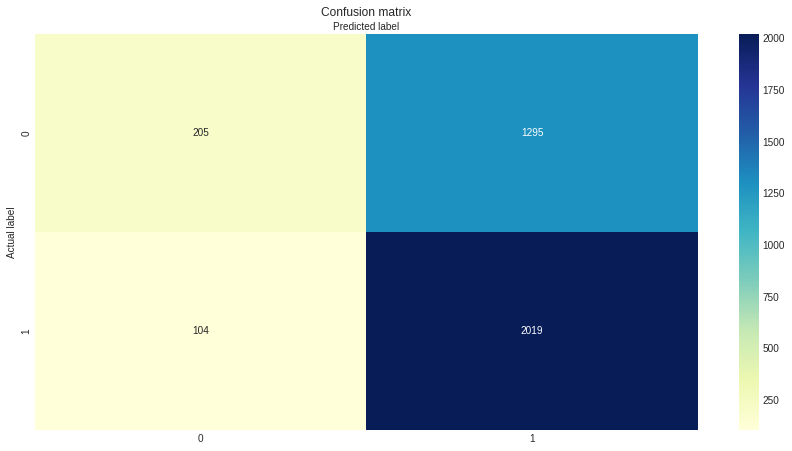

In [44]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6138559205078664
Precision: 0.6092335546167773
Recall: 0.9510127178520961


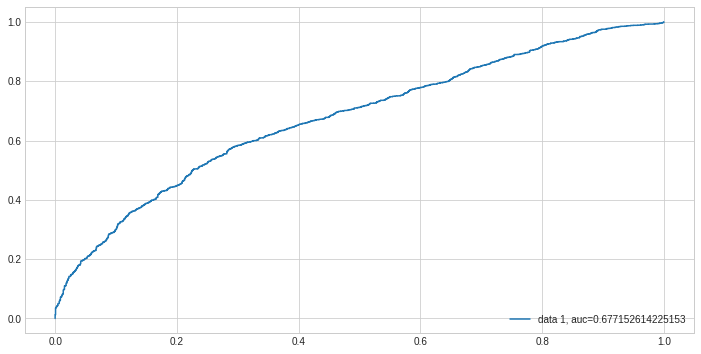

In [46]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Now Making Predictions on New Data Set

In [47]:
#Now Loading Test Data
#Reading xlsx FILE
cf = pd.read_excel('/content/drive/My Drive/Project_Seminar/Test/HoldoutCASocial.xlsx')
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2968 non-null   int64  
 1   Keywords            2968 non-null   object 
 2   Years               2968 non-null   int64  
 3   Months              2968 non-null   int64  
 4   impact_blog         2968 non-null   float64
 5   impact_forum        2968 non-null   float64
 6   impact_news         2968 non-null   float64
 7   impact_review       2968 non-null   float64
 8   impact_twitter      2968 non-null   float64
 9   twitter retweets    2968 non-null   int64  
 10  instagram likes     2968 non-null   int64  
 11  sentiment_negative  2968 non-null   int64  
 12  sentiment_neutral   2968 non-null   int64  
 13  sentiment_positive  2968 non-null   int64  
 14  full text           2968 non-null   object 
 15  hashtags            2968 non-null   object 
 16  media 

In [48]:
##We want to see the columns which has atleast 2000 and above observations 
CMM = cf.dropna(axis='columns', thresh = 2000)

In [49]:
# Drop the 'Unnamed: 0', 'full text', 'hashtags' and 'media urls' columns
CMM.drop(['Unnamed: 0', 'full text', 'hashtags', 'media urls'], axis='columns', inplace=True)
CMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            2968 non-null   object 
 1   Years               2968 non-null   int64  
 2   Months              2968 non-null   int64  
 3   impact_blog         2968 non-null   float64
 4   impact_forum        2968 non-null   float64
 5   impact_news         2968 non-null   float64
 6   impact_review       2968 non-null   float64
 7   impact_twitter      2968 non-null   float64
 8   twitter retweets    2968 non-null   int64  
 9   instagram likes     2968 non-null   int64  
 10  sentiment_negative  2968 non-null   int64  
 11  sentiment_neutral   2968 non-null   int64  
 12  sentiment_positive  2968 non-null   int64  
 13  country             2968 non-null   object 
 14  category            2968 non-null   object 
dtypes: float64(5), int64(7), object(3)
memory usage: 347.9+

In [50]:
#taking all variables for test
z_test = CMM.drop(['country', 'category', 'Keywords'], axis=1)
z_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Years               2968 non-null   int64  
 1   Months              2968 non-null   int64  
 2   impact_blog         2968 non-null   float64
 3   impact_forum        2968 non-null   float64
 4   impact_news         2968 non-null   float64
 5   impact_review       2968 non-null   float64
 6   impact_twitter      2968 non-null   float64
 7   twitter retweets    2968 non-null   int64  
 8   instagram likes     2968 non-null   int64  
 9   sentiment_negative  2968 non-null   int64  
 10  sentiment_neutral   2968 non-null   int64  
 11  sentiment_positive  2968 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 278.4 KB


In [51]:
#taking all variables and full data for test 
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

'X' shape: (10350, 12)
'y' shape: (10350,)


In [52]:
X_train = X
y_train = y

In [53]:
#Create New Model 
logreg1 = LogisticRegression(max_iter=3000)

# fit the model with full data
logreg1.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [54]:
predictions = logreg1.predict(z_test)

In [55]:
predictions1 = pd.DataFrame(predictions, columns=['trend'])
predictions1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   trend   2968 non-null   uint8
dtypes: uint8(1)
memory usage: 3.0 KB


In [56]:
new_file = pd.concat([CMM, predictions1], axis =1)
new_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            2968 non-null   object 
 1   Years               2968 non-null   int64  
 2   Months              2968 non-null   int64  
 3   impact_blog         2968 non-null   float64
 4   impact_forum        2968 non-null   float64
 5   impact_news         2968 non-null   float64
 6   impact_review       2968 non-null   float64
 7   impact_twitter      2968 non-null   float64
 8   twitter retweets    2968 non-null   int64  
 9   instagram likes     2968 non-null   int64  
 10  sentiment_negative  2968 non-null   int64  
 11  sentiment_neutral   2968 non-null   int64  
 12  sentiment_positive  2968 non-null   int64  
 13  country             2968 non-null   object 
 14  category            2968 non-null   object 
 15  trend               2968 non-null   uint8  
dtypes: flo

In [57]:
from google.colab import files
new_file.to_csv('file_name_CA_LG.csv') 
files.download('file_name_CA_LG.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
#SO FAR SO GOOD HERE WITH LOGISTIC

In [59]:
pip install xgboost

In [60]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [61]:
#lets start with the default hyperparameters and hold-out mechanism for train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35)

#XGBoost
xgb_mdl = XGBClassifier().fit(X_train.values,y_train.values)
xgb_mdl

XGBClassifier()

Train Data Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      2818
           1       0.76      0.77      0.77      3909

    accuracy                           0.73      6727
   macro avg       0.72      0.72      0.72      6727
weighted avg       0.73      0.73      0.73      6727

Test Data Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.63      0.65      1525
           1       0.74      0.78      0.76      2098

    accuracy                           0.71      3623
   macro avg       0.71      0.70      0.70      3623
weighted avg       0.71      0.71      0.71      3623



[Text(90.5, 0.5, 'real values'),
 Text(0.5, 36.5, 'predicted values'),
 Text(0.5, 1.0, 'Confusion Matrix')]

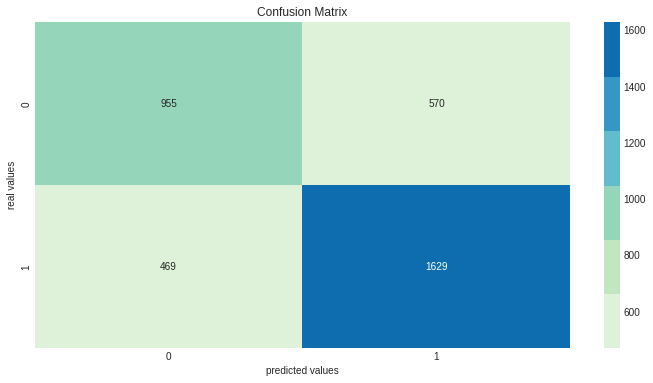

In [62]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score

#XGBoost
y_pred_train = xgb_mdl.predict(X_train.values)
y_pred = xgb_mdl.predict(X_test.values)

print("Train Data Classification Report:\n")
print(classification_report(y_train,y_pred_train))

print("Test Data Classification Report:\n")
print(classification_report(y_test,y_pred))

#generate a confusion matrix to visualise precision, recall, misclassification and false alarms
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = list(set(y)), columns = list(set(y)))

#visualise the confusion matrix in the heatmap form
plt.figure()
sns.heatmap(cm, annot = True, fmt="d",
            cmap=sns.color_palette("GnBu")).set(xlabel='predicted values', 
                                                ylabel='real values', 
                                                title = 'Confusion Matrix')

In [63]:
##Gradient Boosting Work better

In [64]:
#taking all variables for test
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

X_train = X
y_train = y

'X' shape: (10350, 12)
'y' shape: (10350,)


In [65]:
#XGBoost
xgb_mdl1 = XGBClassifier().fit(X_train,y_train)
xgb_mdl1

XGBClassifier()

In [66]:
predictions_xgb = xgb_mdl1.predict(z_test)

In [67]:
predictions_xgb1 = pd.DataFrame(predictions_xgb, columns=['trend'])
predictions_xgb1

,trend
0,0
1,1
2,1
3,1
4,1
...,...
2963,1
2964,1
2965,1
2966,1


In [68]:
new_file_xgb = pd.concat([CMM, predictions_xgb1], axis =1)
new_file_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            2968 non-null   object 
 1   Years               2968 non-null   int64  
 2   Months              2968 non-null   int64  
 3   impact_blog         2968 non-null   float64
 4   impact_forum        2968 non-null   float64
 5   impact_news         2968 non-null   float64
 6   impact_review       2968 non-null   float64
 7   impact_twitter      2968 non-null   float64
 8   twitter retweets    2968 non-null   int64  
 9   instagram likes     2968 non-null   int64  
 10  sentiment_negative  2968 non-null   int64  
 11  sentiment_neutral   2968 non-null   int64  
 12  sentiment_positive  2968 non-null   int64  
 13  country             2968 non-null   object 
 14  category            2968 non-null   object 
 15  trend               2968 non-null   uint8  
dtypes: flo

In [69]:
from google.colab import files
new_file_xgb.to_csv('new_file_CA_xgb.csv') 
files.download('new_file_CA_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
#Everything is good here

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from sklearn import datasets

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostRegressor

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [73]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=3000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [74]:
# Initialize individual models
clf_1 = KNeighborsClassifier()
clf_2 = LogisticRegression(max_iter=3000)
clf_3 = DecisionTreeClassifier()

In [75]:
# Create trend classifier
voting_ens = VotingClassifier(
    estimators=[('knn', clf_1), ('lr', clf_2), ('dt', clf_3)], voting='hard')

In [76]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.64258114374034
LogisticRegression 0.6213292117465224
DecisionTreeClassifier 0.6568778979907264
VotingClassifier 0.6816074188562596


In [98]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, precision_score(y_test, y_pred))

KNeighborsClassifier 0.7914754098360656
LogisticRegression 0.6113924050632912
DecisionTreeClassifier 0.9959100204498977
VotingClassifier 0.8330464716006885


In [96]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, f1_score(y_test, y_pred))

KNeighborsClassifier 0.7974892632969938
LogisticRegression 0.7484504132231407
DecisionTreeClassifier 0.9841697541259684
VotingClassifier 0.8949152542372881


In [97]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, recall_score(y_test, y_pred))

KNeighborsClassifier 0.8035952063914781
LogisticRegression 0.9647137150466045
DecisionTreeClassifier 0.9727030625832224
VotingClassifier 0.966711051930759


In [77]:
#Now Using Ensemble Modeling

In [78]:
#taking all variables for test
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

X_train = X
y_train = y

'X' shape: (10350, 12)
'y' shape: (10350,)


In [79]:
# Initialize individual models
clf_1 = KNeighborsClassifier()
clf_2 = LogisticRegression(max_iter=3000)
clf_3 = DecisionTreeClassifier()

In [80]:
# Create trend classifier
voting_ens = VotingClassifier(
    estimators=[('knn', clf_1), ('lr', clf_2), ('dt', clf_3)], voting='hard')

In [81]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(z_test)

In [82]:
#Ensembling
predictions_ensem = pd.DataFrame(y_pred, columns=['trend'])
predictions_ensem

,trend
0,1
1,1
2,1
3,1
4,1
...,...
2963,1
2964,1
2965,1
2966,0


In [83]:
new_file_ensem = pd.concat([CMM, predictions_ensem], axis =1)
new_file_ensem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            2968 non-null   object 
 1   Years               2968 non-null   int64  
 2   Months              2968 non-null   int64  
 3   impact_blog         2968 non-null   float64
 4   impact_forum        2968 non-null   float64
 5   impact_news         2968 non-null   float64
 6   impact_review       2968 non-null   float64
 7   impact_twitter      2968 non-null   float64
 8   twitter retweets    2968 non-null   int64  
 9   instagram likes     2968 non-null   int64  
 10  sentiment_negative  2968 non-null   int64  
 11  sentiment_neutral   2968 non-null   int64  
 12  sentiment_positive  2968 non-null   int64  
 13  country             2968 non-null   object 
 14  category            2968 non-null   object 
 15  trend               2968 non-null   uint8  
dtypes: flo

In [84]:
from google.colab import files
new_file_ensem.to_csv('new_file_CA_ensem.csv') 
files.download('new_file_CA_ensem.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
# Filter out columns of our interest in ensem
pf_ensem = new_file_ensem.loc[:, ["Keywords", "trend"]]
pf_ensem

,Keywords,trend
0,Arsenic,1
1,Arsenic,1
2,Arsenic,1
3,Arsenic,1
4,Arsenic,1
...,...,...
2963,quinoa,1
2964,quinoa,1
2965,quinoa,1
2966,quinoa,0


In [86]:
# Filter out columns of our interest in xgb
pf_xgb = new_file_xgb.loc[:, ["Keywords", "trend"]]
pf_xgb

,Keywords,trend
0,Arsenic,0
1,Arsenic,1
2,Arsenic,1
3,Arsenic,1
4,Arsenic,1
...,...,...
2963,quinoa,1
2964,quinoa,1
2965,quinoa,1
2966,quinoa,1


In [87]:
# Filter out columns of our interest in xgb
pf_lg = new_file.loc[:, ["Keywords", "trend"]]
pf_lg

,Keywords,trend
0,Arsenic,1
1,Arsenic,1
2,Arsenic,1
3,Arsenic,1
4,Arsenic,1
...,...,...
2963,quinoa,1
2964,quinoa,1
2965,quinoa,0
2966,quinoa,0


In [88]:
result = pd.concat([pf_ensem, pf_xgb, pf_lg], axis=1)
result.columns = ['Keywords', 'ensem_trend', 'Keywords2', 'xgb_trend', 'Keywords3', 'lg_trend']
all_model = result.drop(['Keywords2', 'Keywords3'], axis=1)

In [89]:
all_model

,Keywords,ensem_trend,xgb_trend,lg_trend
0,Arsenic,1,0,1
1,Arsenic,1,1,1
2,Arsenic,1,1,1
3,Arsenic,1,1,1
4,Arsenic,1,1,1
...,...,...,...,...
2963,quinoa,1,1,1
2964,quinoa,1,1,1
2965,quinoa,1,1,0
2966,quinoa,0,1,0


In [90]:
cols_to_sum = all_model.columns[ : all_model.shape[0]-0]
cols_to_sum
all_model['total_count'] = all_model[cols_to_sum].sum(axis=1)

In [91]:
# create a list of our conditions
conditions = [
    (all_model['total_count'] < 2),
    (all_model['total_count'] >= 2)
    ]
# create a list of the values we want to assign for each condition
values = ['no trend', 'trend']

# create a new column and use np.select to assign values to it using our lists as arguments
all_model['trend?'] = np.select(conditions, values)

# display updated DataFrame
all_model

,Keywords,ensem_trend,xgb_trend,lg_trend,total_count,trend?
0,Arsenic,1,0,1,2,trend
1,Arsenic,1,1,1,3,trend
2,Arsenic,1,1,1,3,trend
3,Arsenic,1,1,1,3,trend
4,Arsenic,1,1,1,3,trend
...,...,...,...,...,...,...
2963,quinoa,1,1,1,3,trend
2964,quinoa,1,1,1,3,trend
2965,quinoa,1,1,0,2,trend
2966,quinoa,0,1,0,1,no trend


In [92]:
all_model1 = all_model.groupby(['Keywords'])['trend?'].agg(pd.Series.mode).reset_index()

In [93]:
from google.colab import files
all_model1.to_csv('all_model1.csv') 
files.download('all_model1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**That's all folks**